In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , cross_validate ,cross_val_score
from sklearn import metrics

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/mushrooms.csv')

In [16]:
dataset.iloc[1,:]

type                        e
cap_shape                   x
cap_surface                 s
cap_color                   y
bruises                     t
odor                        a
gill_attachment             f
gill_spacing                c
gill_size                   b
gill_color                  k
stalk_shape                 e
stalk_root                  c
stalk_surface_above_ring    s
stalk_surface_below_ring    s
stalk_color_above_ring      w
stalk_color_below_ring      w
veil_type                   p
veil_color                  w
ring_number                 o
ring_type                   p
spore_print_color           n
population                  n
habitat                     g
Name: 1, dtype: object

In [8]:
len(dataset.columns)

23

In [23]:
for i in range(len(dataset.columns)):
    if(type(dataset.iloc[1,i])== str):
        print(dataset.iloc[:,i].name)
        dataset[dataset.iloc[:,i].name] = LabelEncoder().fit_transform(dataset.iloc[:,i])
        

type
cap_shape
cap_surface
cap_color
bruises
odor
gill_attachment
gill_spacing
gill_size
gill_color
stalk_shape
stalk_root
stalk_surface_above_ring
stalk_surface_below_ring
stalk_color_above_ring
stalk_color_below_ring
veil_type
veil_color
ring_number
ring_type
spore_print_color
population
habitat


<AxesSubplot:>

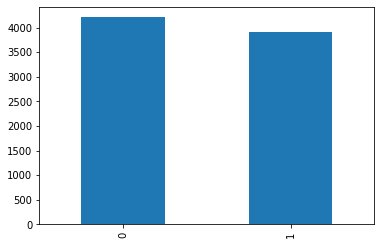

In [41]:
dataset.iloc[:,0].value_counts().plot(kind='bar')

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   type                      8124 non-null   int32
 1   cap_shape                 8124 non-null   int32
 2   cap_surface               8124 non-null   int32
 3   cap_color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill_attachment           8124 non-null   int32
 7   gill_spacing              8124 non-null   int32
 8   gill_size                 8124 non-null   int32
 9   gill_color                8124 non-null   int32
 10  stalk_shape               8124 non-null   int32
 11  stalk_root                8124 non-null   int32
 12  stalk_surface_above_ring  8124 non-null   int32
 13  stalk_surface_below_ring  8124 non-null   int32
 14  stalk_color_above_ring    8124 non-null 

In [38]:
import seaborn as sns



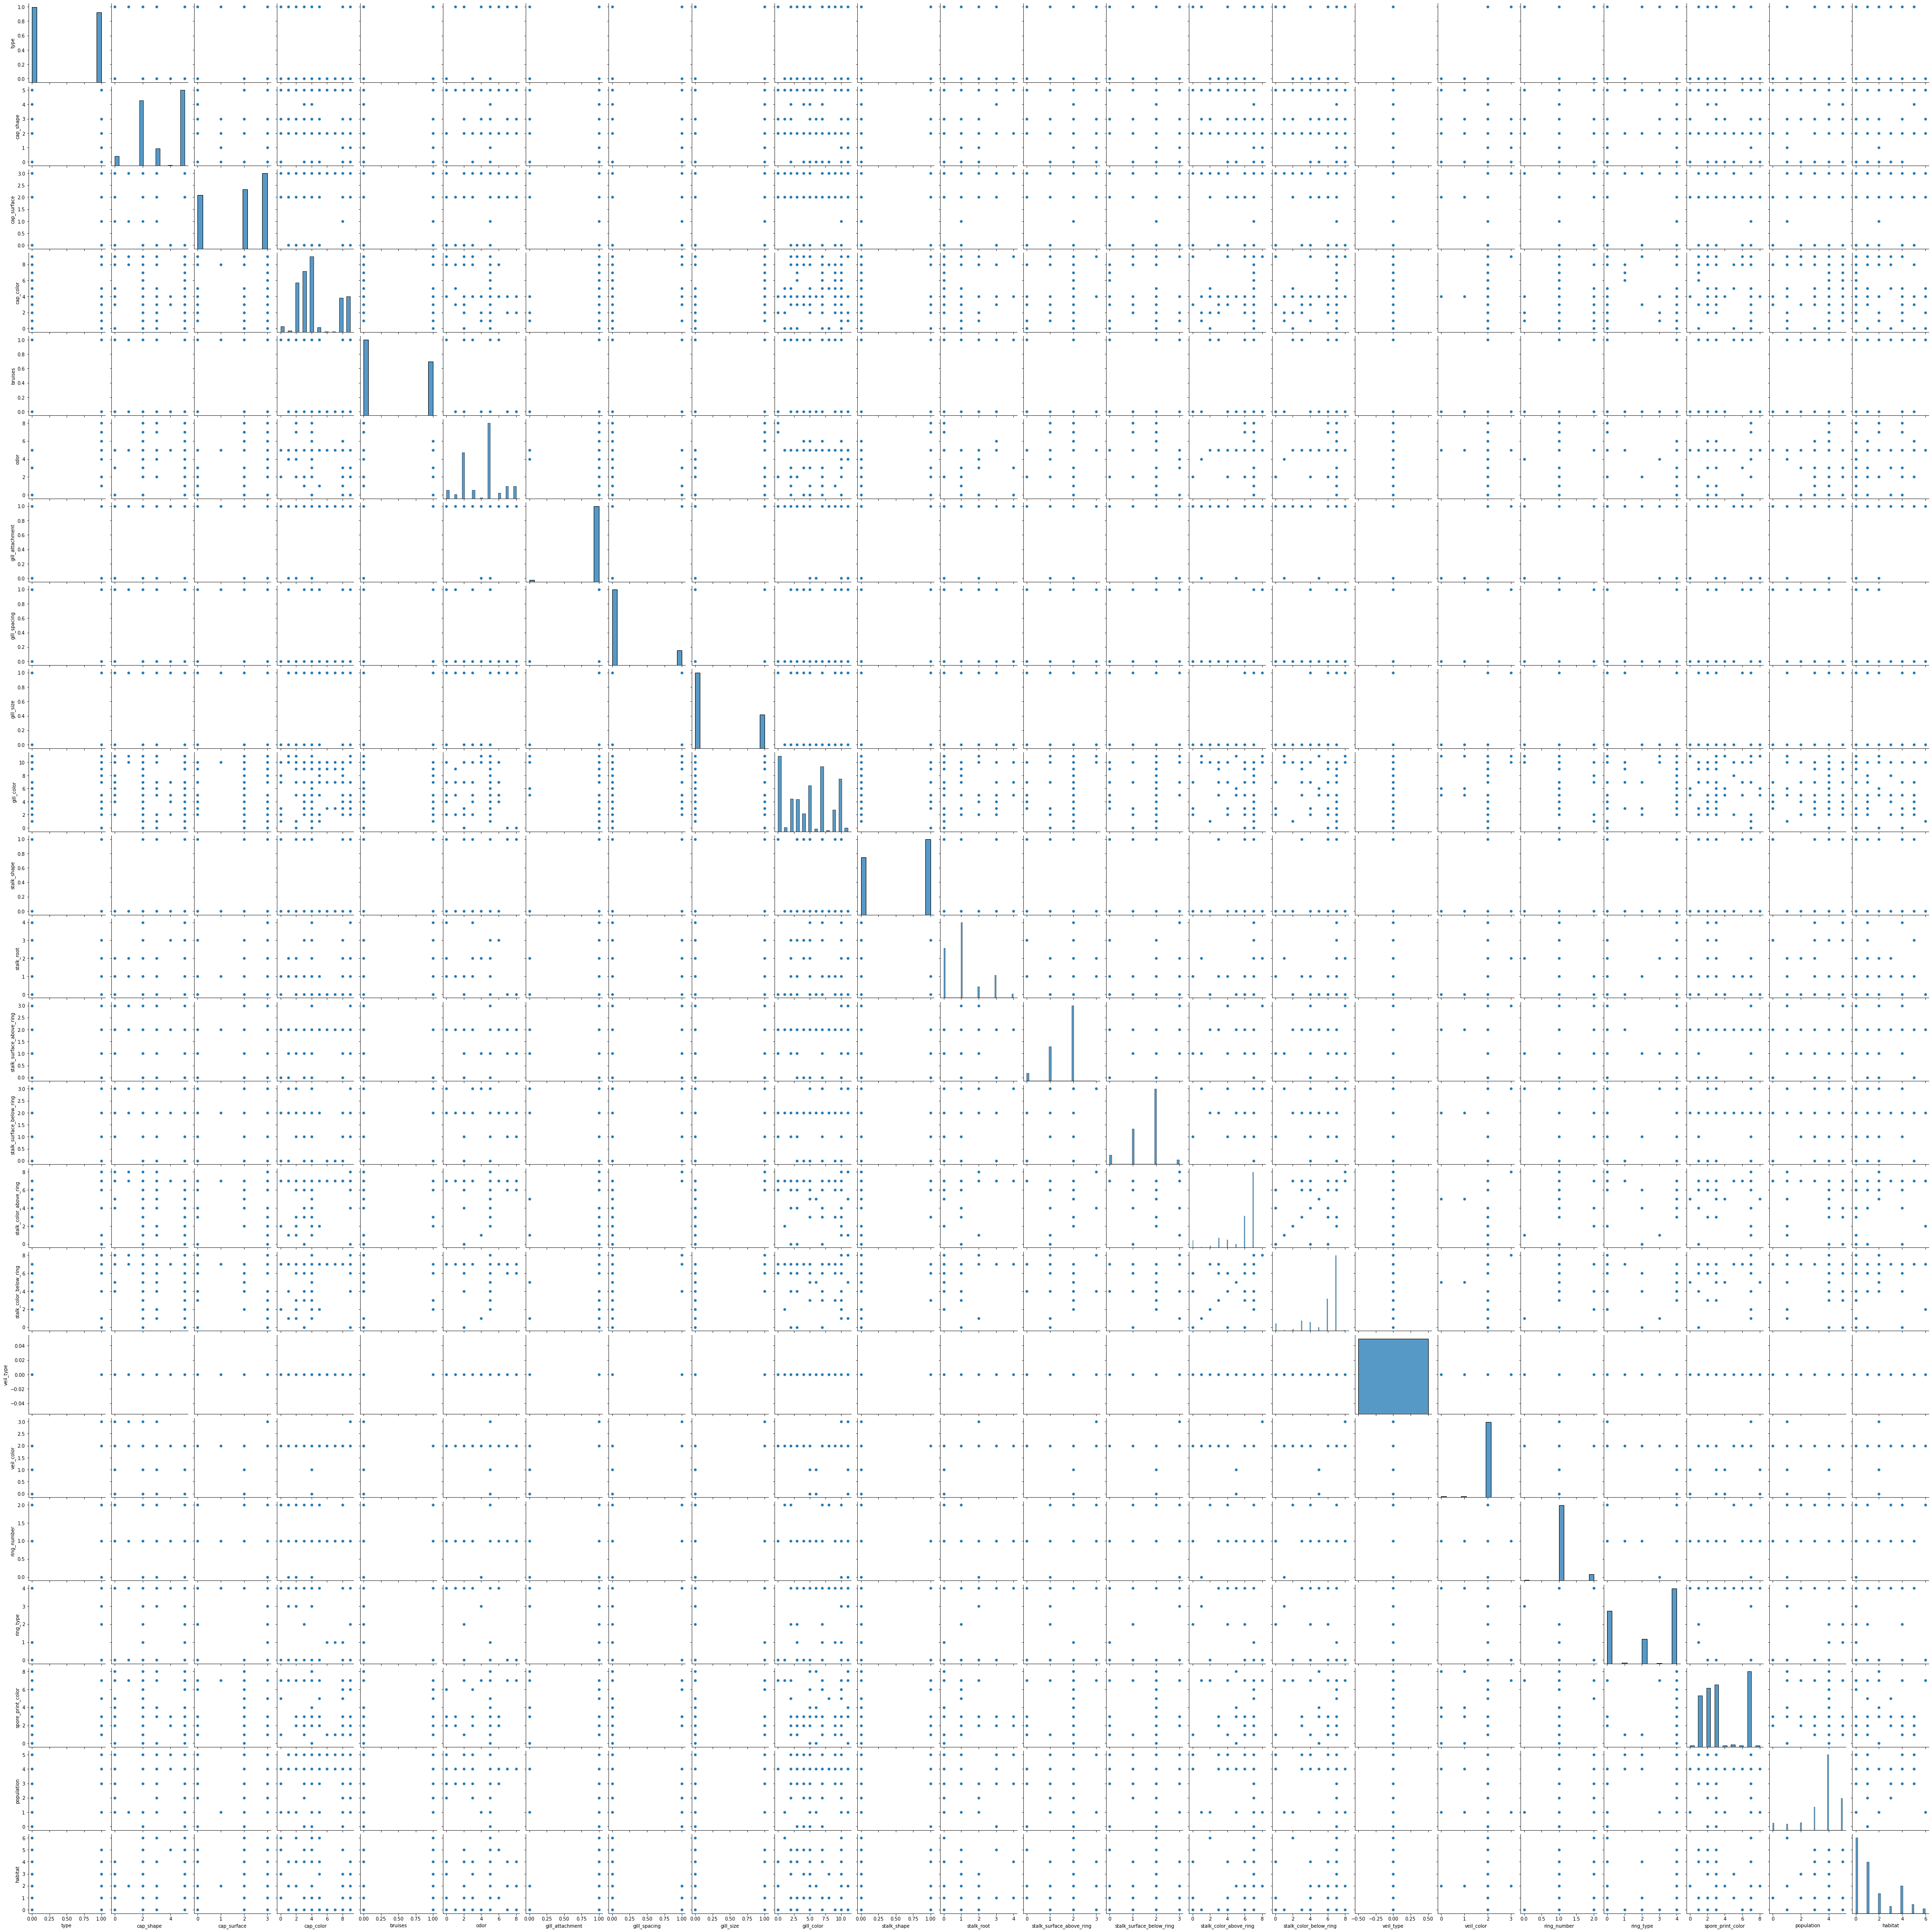

In [40]:
sns.pairplot(data=dataset)

In [50]:
x=dataset.drop(columns=dataset.iloc[:,0].name,axis=1)
y=dataset.iloc[:,0]

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',max_depth=1)
adaboost = AdaBoostClassifier(base_estimator=model,n_estimators=400,learning_rate=1)
boost_model = adaboost.fit(x_train,y_train)
boost_pred = boost_model.predict(x_test)
metrics.accuracy_score(y_test,boost_pred)

1.0

In [49]:
cross_val_score(adaboost,x_train,y_train)

array([1., 1., 1., 1., 1.])